In [1657]:
#!/usr/bin/python3 (3.8.10 x64)
import numpy as np
import pygad
import os
import mazes

Create a function that reads the 2D representation of a maze and returns the shortest path found by a genetic algorithm.

In [1658]:
# Convert mazes into 2D array of chars
def get_maze(maze):
    res = []
    for i in range(len(maze)):
        row = list(list(maze[i])[0])
        res.append(row)
        
    return np.array(res)

In [1659]:
# Convert mazes
maze1 = get_maze(mazes.maze1)
maze2 = get_maze(mazes.maze2)
maze3 = get_maze(mazes.maze3)
maze4 = get_maze(mazes.maze4)
maze5 = get_maze(mazes.maze5)
maze6 = get_maze(mazes.maze6)
maze7 = get_maze(mazes.maze7)
maze3_T = get_maze(mazes.maze3_T) 
maze4_T = get_maze(mazes.maze4_T) 
maze5_T = get_maze(mazes.maze5_T) 
maze7_T = get_maze(mazes.maze7_T) 

In [1660]:
# Return a tuple containing indices of start
def find_start(maze):
    '''
        Return an array containing indices of start
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "S":
                return i,j

In [1661]:
# Return a tuple containing indices of end
def find_end(maze):
    '''
    Return an array containing indices of end
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "E":
                return i,j

Solution will be encoded as follows:
* It will be a vector of values (np array)
* Each value will span from 0 to 3
* Each value corresponds to a direction 
* * 0 - up
* * 1 - down
* * 2 - left
* * 3 - right

Maze: `h x w` matrix, possible values of maze[i,j]:
* `#` - wall
* `.` - valid field
* `S` - starting field
* `E` - ending field

Maze[i,j] gives:
*   (0) up = Maze[i-1, j]
*   (1) down = Maze[i+1, j]
*   (2) left = Maze[i, j-1]
*   (3) right = Maze[i, j+1]

In [1662]:
solutions = [False]
def set_solutions_false():
    solutions[0] = False
    
def shortest_path(maze, i, j, visited):
    if [i,j] in visited:
        return 0
    
    path_len = 0
    visited.append([i,j])
        
    if maze[i,j] == "E":
        solutions[0] = True;
        return 0
    
    if i > 0 and maze[i-1, j] != "#":
        path_len = shortest_path(maze, i-1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
    
    if j > 0 and maze[i, j-1] != "#":
        path_len = shortest_path(maze, i, j-1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
        
    if i < maze.shape[0]-1 and maze[i+1, j] != "#":
        path_len = shortest_path(maze, i+1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
         
    
    if j < maze.shape[1]-1 and maze[i, j+1] != "#":
        path_len = shortest_path(maze, i, j+1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len    
        
    visited.remove([i,j])

    solutions[0] = False
    return path_len

solutions = [False]

In [1663]:
def get_shortest_path(maze):
    set_solutions_false()
    start = find_start(maze)
    m = maze.copy()
    res = shortest_path(m, start[0], start[1], [])
    return res, m
    

In [1664]:
# Choose which maze to solve
maze = maze5


In [1665]:
maze

array([['#', '#', '#', 'E', '#', '#', '#', '#', '#', '#', '#', '#', '#',
        '#', '#'],
       ['#', '.', '.', '.', '.', '.', '.', '.', '.', '#', '#', '#', '.',
        '.', '#'],
       ['#', '#', '#', '#', '#', '#', '#', '#', '.', '.', '.', '.', '.',
        '#', '#'],
       ['#', '.', '.', '.', '.', '.', '#', '#', '.', '#', '#', '#', '.',
        '#', '#'],
       ['#', '.', '#', '#', '#', '.', '.', '.', '.', '.', '#', '#', '.',
        '.', '#'],
       ['#', '.', '.', '.', '.', '.', '#', '#', '#', '.', '.', '.', '#',
        '#', '#'],
       ['#', '#', '#', '#', '.', '#', '#', '#', '#', '.', '#', '.', '#',
        '#', '#'],
       ['#', '#', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.',
        '.', '#'],
       ['#', '#', '#', '#', '#', '#', '#', '.', '#', '.', '#', '#', '#',
        '.', '#'],
       ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '#', '#',
        '#', '#'],
       ['#', '.', '#', '#', '#', '#', '.', 'S', '#', '.', '.', '.', '.',
       

In [1666]:
import time as time

It is hard to find the reward ratio at which the algorithm will choose to go around a wall but still persist until finding the end

In [1703]:
path_len, _ = get_shortest_path(maze)
y, x = find_start(maze)

end = find_end(maze)

def fitness(solution, solution_index):
    '''
        Takes in a maze and a solution and solution_index
        Returns a scalar score
    '''
    score = 0
    seen = []

    i, j = y, x
    valid = 0
    invalid = 0

    
    for move in solution:

        # Determine new position
        if move == 0:
            i -= 1
        elif move == 1:
            i += 1
        elif move == 2:
            j -= 1
        elif move == 3:
            j += 1     

 
        # Out of bounds
        if i < 0 or j < 0 or i > len(maze[0])-1 or j > len(maze[1])-1:
            if score < 0:
                return score
            return -score

        if (i,j) in seen:
            score -= 2
        

        # Valid field
        if maze[i, j] == ".":
            score += 2;        
            valid += 1
            seen.append((i,j))
        
        # Finish
        elif maze[i, j] == "E":
            
            print(f"SOLUTION")#, path_len={valid+invalid}")
            moves = valid + invalid
            score +=  990 + valid**2 - invalid**2 - moves
            
            # Account for extra steps
            #print(moves, path_len, "minus = ", moves-path_len)
            #if moves > path_len:
            #    score -= moves - path_len
                
            return score
        
        
        # Penalize wall and path length
        elif maze[i, j] == "#":
            #if score < 0:
            #    return score
            #return -score
            score -= 100  # (path_len - ix)**2
            invalid += 1
            seen.append((i,j))
        score -= 1
    
    return score


In [1720]:
num_generations = 2000
num_parents_mating = 100

solutions_per_pop = 100

num_genes, dfs_solution = get_shortest_path(maze)
num_genes =  maze.shape[0]**2
num_genes += 1
print(num_genes)

init_range_low = 0
init_range_high = 4

parent_selection_type = "sss"
keep_parents = 50

crossover_type = "single_point"
crossover_probability = 0.1

mutation_type = "swap"
mutation_probability = 0.1
mutation_percent_genes = 0.1

226


In [1721]:
def callback_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [1722]:
unique_vals = []
def on_crossover(ga_instance, children):
    print(ga_instance.generations_completed, children)
    unique_vals.append(children[0][0])
    
first_child = []
def on_mutation(ga_instance, children):
    first_child.append(children[0])

In [1723]:
ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=solutions_per_pop,
                        num_genes=num_genes,
                        gene_type=int,
                        parent_selection_type=parent_selection_type,
                        crossover_type=crossover_type,
                        #crossover_probability=crossover_probability,
                        mutation_type=mutation_type,
                        random_mutation_min_val=0,
                        random_mutation_max_val=3,
                        #suppress_warnings=True,
                        gene_space=[0,1,2,3],
                        #mutation_percent_genes=mutation_percent_genes,
                        mutation_probability=mutation_probability,
                        on_generation=callback_gen,
                        random_seed=420,
                        #on_crossover=on_crossover
                        )

In [1734]:
def visualize(maze, solution):
    m = maze.copy()
    i, j = find_start(maze)
    sol = []
    solved = False
    ix = 0
    for step in solution:
        ix += 1
        
        try:
     
            if step == 0:
                sol.append("U")
                i -= 1
            elif step == 1:
                sol.append("D")
                i += 1
            elif step == 2:
                sol.append("L")
                j -= 1
            elif step == 3:
                sol.append("R")
                j += 1
                
                
            if m[i,j] == "E":
                solved = True
                m[i,j] = "X"
            if (i > -1 and j > -1 and solved == False):
                m[i, j] = f"{ix}" 
            if solved:
                return m, sol
        except Exception as e: #IndexError:
            #print(f"Exception: {e}")
            pass
            
    return m, sol


In [1727]:
ga_instance.run()

SOLUTION, path_len=31
SOLUTION, path_len=37
SOLUTION, path_len=23
SOLUTION, path_len=37
SOLUTION, path_len=37
SOLUTION, path_len=37
SOLUTION, path_len=37
SOLUTION, path_len=31
SOLUTION, path_len=151
SOLUTION, path_len=129
SOLUTION, path_len=183
SOLUTION, path_len=125
SOLUTION, path_len=119
SOLUTION, path_len=115
SOLUTION, path_len=149
SOLUTION, path_len=123
SOLUTION, path_len=31
SOLUTION, path_len=37
SOLUTION, path_len=23
SOLUTION, path_len=31
SOLUTION, path_len=119
SOLUTION, path_len=37
SOLUTION, path_len=37
SOLUTION, path_len=37
SOLUTION, path_len=151
SOLUTION, path_len=149
SOLUTION, path_len=115
SOLUTION, path_len=125
SOLUTION, path_len=119
SOLUTION, path_len=183
SOLUTION, path_len=105
SOLUTION, path_len=123
SOLUTION, path_len=151
Generation :  1
SOLUTION, path_len=31
SOLUTION, path_len=37
SOLUTION, path_len=23
SOLUTION, path_len=31
SOLUTION, path_len=119
SOLUTION, path_len=37
SOLUTION, path_len=37
SOLUTION, path_len=37
SOLUTION, path_len=151
SOLUTION, path_len=149
SOLUTION, path_le

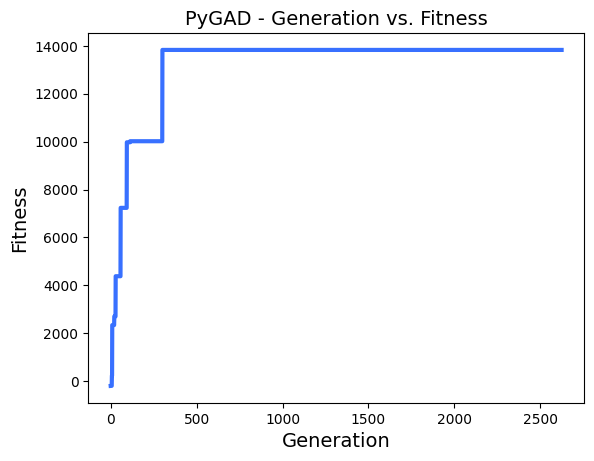

SOLUTION, path_len=37
SOLUTION, path_len=35
SOLUTION, path_len=135
Parameters of the best solution : [2 2 0 3 3 0 2 1 0 3 0 2 2 1 0 1 0 2 1 3 0 2 0 2 3 1 3 1 0 3 2 0 2 1 3 0 0
 2 2 3 1 2 1 2 3 2 3 3 3 3 1 1 1 0 3 1 1 0 2 2 0 2 2 3 1 0 3 2 3 3 3 0 0 2
 1 1 1 3 3 0 3 2 2 3 2 1 0 3 1 0 0 1 3 3 1 0 2 3 1 3 0 0 2 0 2 0 1 3 1 2 1
 3 2 2 2 0 0 0 0 2 0 2 3 0 1 2 1 3 0 2 1 2 0 1 2 3 2 0 1 0 2 1 3 2 0 3 3 1
 2 3 0 3 2 0 1 0 1 2 1 2 0 3 0 0 3 1 1 3 0 2 2 1 3 1 0 3 3 2 2 0 2 3 3 3 0
 1 1 1 0 2 3 3 2 2 1 2 3 2 1 2 3 0 2 1 1 1 0 3 0 2 2 0 0 1 0 0 3 2 2 3 3 0
 2 0 3 0] index =  0
Fitness value of the best solution = 13828


In [1728]:
ga_instance.plot_fitness()
#ga_instance.save("maze2-solved-2")

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution), "index = ", solution_idx)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
#print(unique_vals)
#prediction = np.sum(np.array(ins)*solution)
#print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

In [1735]:
m, sol = visualize(maze, solution)

_, dfs_solution = get_shortest_path(maze)
#print("solution", sol)
print("GA\n", m, len(solution), "\n")
print("DFS\n", dfs_solution)

GA
 [['#' '#' '#' 'X' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '.' '2' '2' '.' '.' '.' '.' '.' '#' '#' '#' '.' '.' '#']
 ['#' '#' '2' '2' '1' '#' '1' '#' '.' '.' '.' '.' '.' '#' '#']
 ['#' '2' '2' '2' '1' '1' '1' '#' '.' '#' '#' '#' '.' '#' '#']
 ['#' '.' '2' '1' '1' '1' '1' '1' '.' '.' '#' '#' '.' '.' '#']
 ['#' '.' '2' '2' '2' '1' '1' '1' '#' '.' '.' '.' '#' '#' '#']
 ['#' '#' '2' '2' '2' '3' '#' '1' '#' '1' '#' '.' '#' '#' '#']
 ['#' '#' '4' '2' '2' '4' '7' '1' '#' '1' '1' '.' '.' '.' '#']
 ['#' '#' '#' '2' '1' '2' '7' '1' '9' '1' '1' '1' '#' '.' '#']
 ['#' '.' '.' '6' '6' '6' '7' '1' '1' '1' '1' '1' '#' '#' '#']
 ['#' '.' '#' '#' '6' '6' '7' '8' '8' '.' '9' '1' '.' '#' '#']
 ['#' '#' '.' '.' '.' '.' '#' '5' '#' '#' '#' '#' '#' '#' '#']
 ['#' '.' '.' '#' '#' '.' '.' '.' '.' '.' '.' '.' '.' '.' '#']
 ['#' '#' '.' '.' '.' '#' '#' '#' '.' '#' '#' '.' '#' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']] 226 

DFS
 [['#' '#' '#' 'E' '#' '#' '#' '#' '#' '